<a href="https://colab.research.google.com/github/kalyankalluri1996/Heruko-1/blob/main/pre%20check_final_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #To read and edit tabular data
import numpy as np #To perform array/matrix operations
import matplotlib.pyplot as plt #To perform plotting
import seaborn as sns  #To perform visualization
%matplotlib inline
import matplotlib.colors as mcolors
import warnings  #To ignore warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('bank-full.csv', sep=';')
print("Data points:{}".format(df.shape[0]))
print("Features:{}".format(df.shape[1]))

Data points:45211
Features:17


**Checking the basic info of the data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


**Checking for Class Balance**

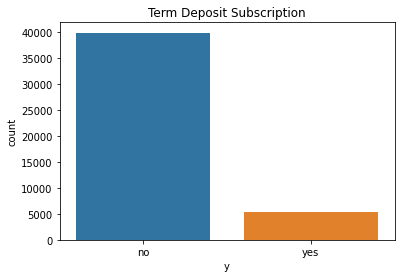

In [ ]:
#count of rows for each type in a column
sns.countplot(df['y'])
plt.title("Term Deposit Subscription")
plt.show()

In [ ]:
df['deposit'] = (df.y == 'yes').astype('int')

In [ ]:
yes = len(df[df['y']=="yes"])
no = len(df[df['y']=="no"])
print("There is a class Imbalance of {} to {}% in favour of {}"
      .format(
              round(yes/len(df)*100,2),
              round(no/len(df)*100,2),
              df['y'].value_counts().index[0]))

There is a class Imbalance of 11.7 to 88.3% in favour of no


In [ ]:
df[list(df.columns)].head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


 Unique values of all the features

In [ ]:
# check each column
for i in list(df.columns):
    
    # listed unique values for each column
    l = df[i].unique()
    
    # if listed values are less than 30 print them else print the count of unique values in that column
    if len(l)<30:
        print(i)
        print(l)
    else:
        print(i + ' - ' +str(len(l)) + ' unique values')

age - 77 unique values
job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
balance - 7168 unique values
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
day - 31 unique values
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration - 1573 unique values
campaign - 48 unique values
pdays - 559 unique values
previous - 41 unique values
poutcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']
deposit
[0 1]


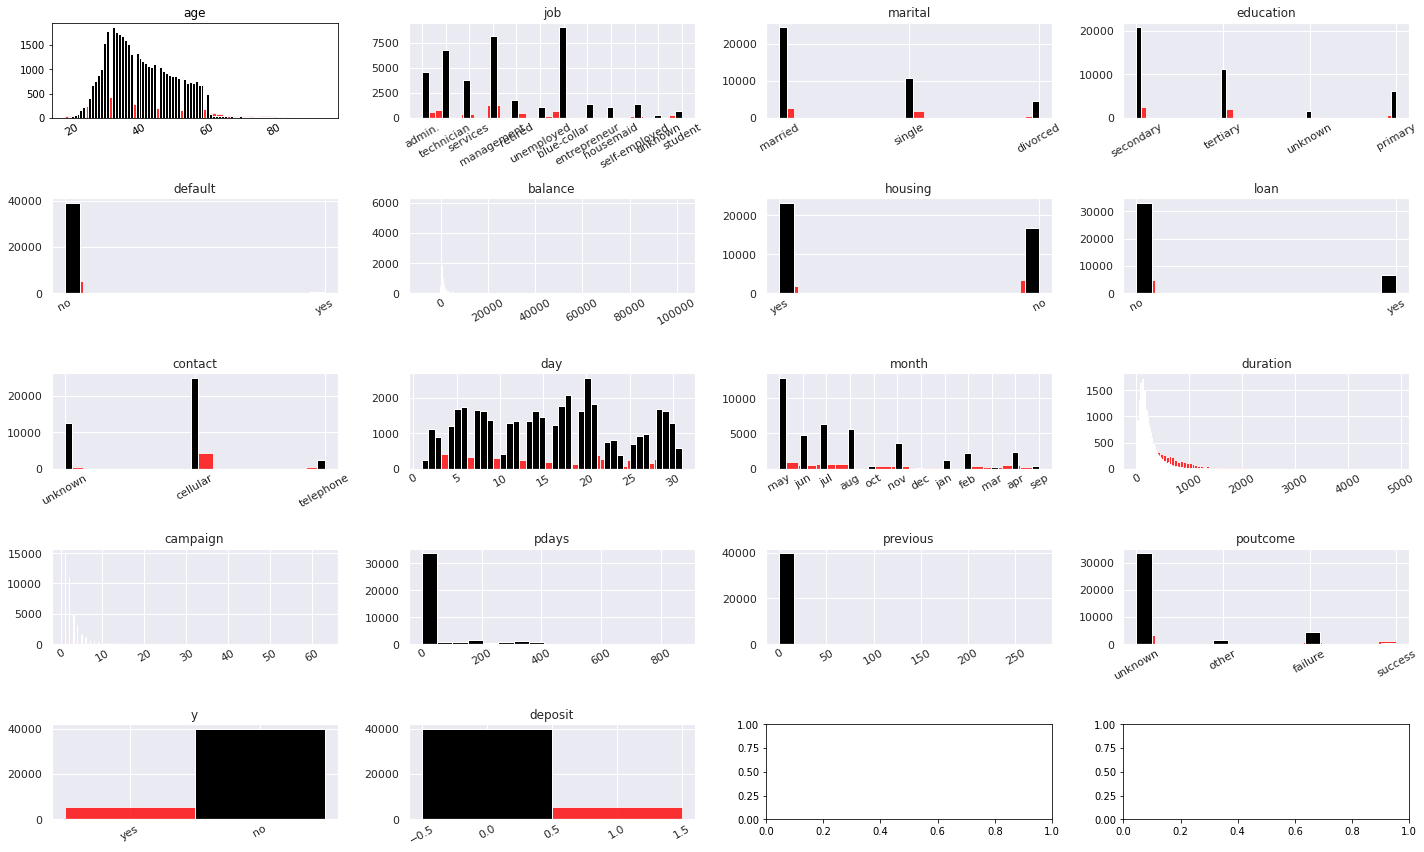

In [ ]:
# Create histograms for features separated by prediction label value
columnname = 'y'

plot = df.copy()
#register_matplotlib_converters()

list_len = plot.shape[1]
ncols = 4
nrows = int(round(list_len / ncols, 0))
if ncols * nrows < list_len:
    nrows += 1

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=False, figsize=(20, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for a in range(0, list_len):
        feature = plot.columns[a]
        ax = plt.subplot(nrows, ncols, a+1)
        y0 = plot[plot[columnname]=='yes'][feature]
        ax.hist(y0, color='red', alpha=0.8, label= feature + f'-{columnname}', bins='auto', edgecolor='w')
        y1 = plot[plot[columnname]=='no'][feature]
        ax.hist(y1, color='black', label=feature + f'-No{columnname}', bins='auto', edgecolor='w')
        ax.set_title(feature)
        ax.tick_params(axis="x", rotation=30, labelsize=11, length=0)
        sns.set(style="darkgrid")  
fig.tight_layout()
plt.show()

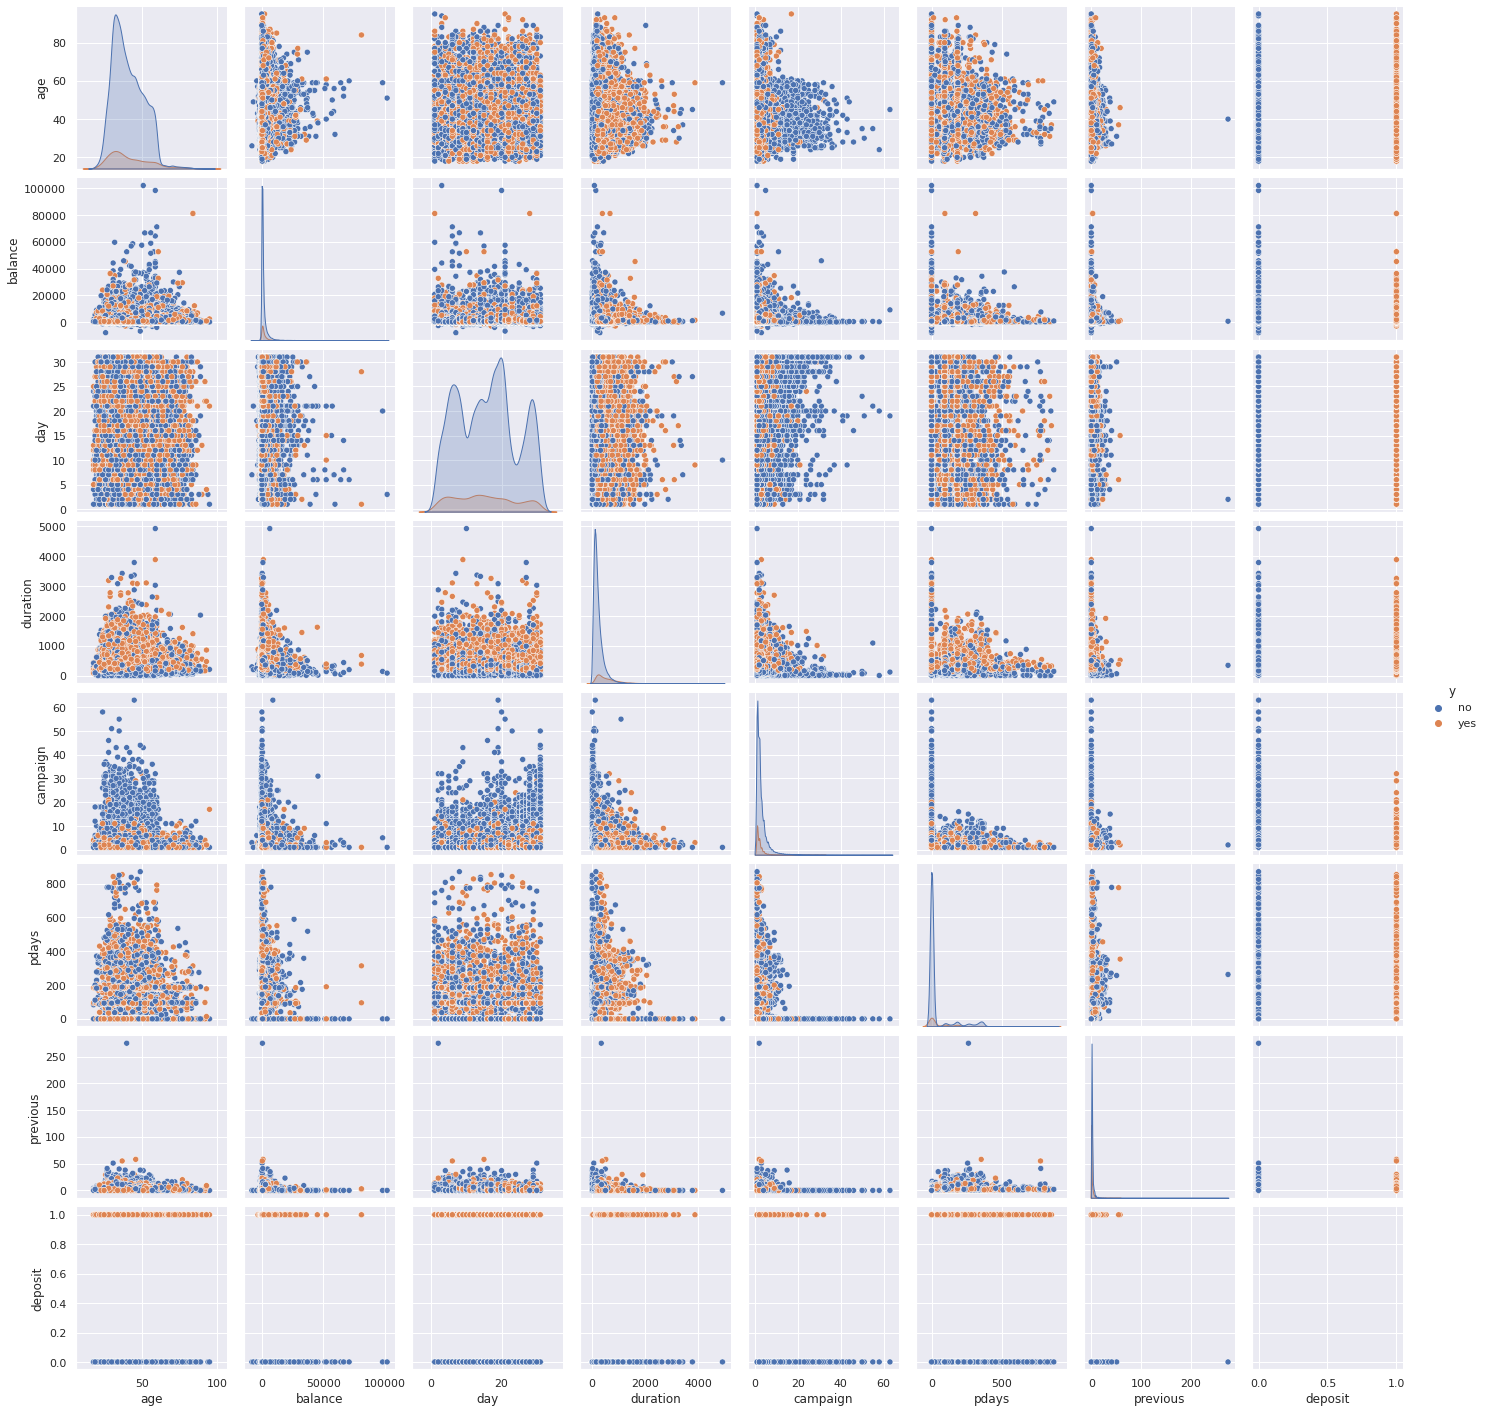

In [ ]:
sns.pairplot(df, hue='y',dropna = True)

Numerical Features

In [ ]:
num= ['campaign', 'pdays','balance','duration','day','previous','age']

In [ ]:
df[num].head()

,campaign,pdays,balance,duration,day,previous,age
0,1,-1,2143,261,5,0,58
1,1,-1,29,151,5,0,44
2,1,-1,2,76,5,0,33
3,1,-1,1506,92,5,0,47
4,1,-1,1,198,5,0,33


**Exploration on Numerical Features**

To find Outliers 

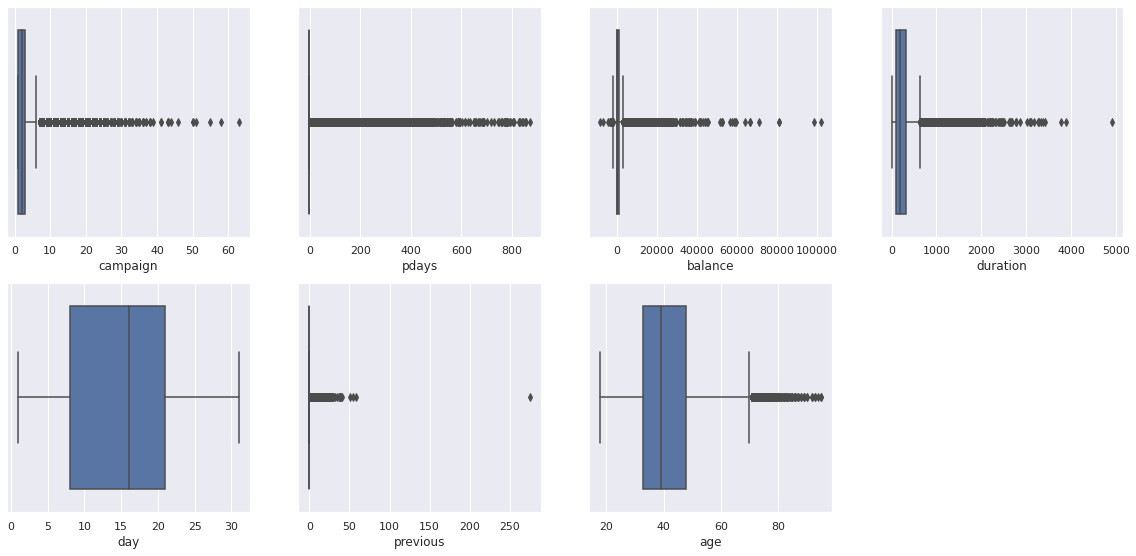

In [ ]:
#Boxplot to find outliers on each numerical column 
plt.figure(figsize=(20,60), facecolor='white')
plotnum =1
for feature in num:
    ax = plt.subplot(12,4,plotnum)
    sns.boxplot(df[feature])
    plt.xlabel(feature)
    plotnum+=1
plt.show()

Correlation between Numerical features

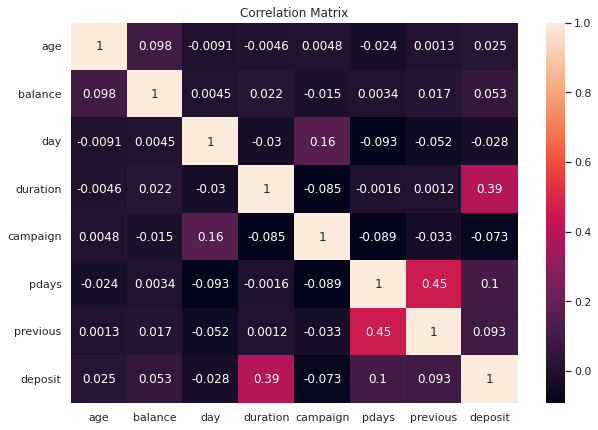

In [ ]:
cor=df.corr()
fig = plt.figure(figsize=(10,7))
plt.title('Correlation Matrix')
sns.heatmap(cor,annot=True)

Categorical Features

In [ ]:
cat = ['job', 'marital', 
       'education', 'default',
       'housing', 'loan', 'contact', 'month', 'poutcome']

In [ ]:
df.describe(include=[object])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


Graphical Representation of Categorical Features

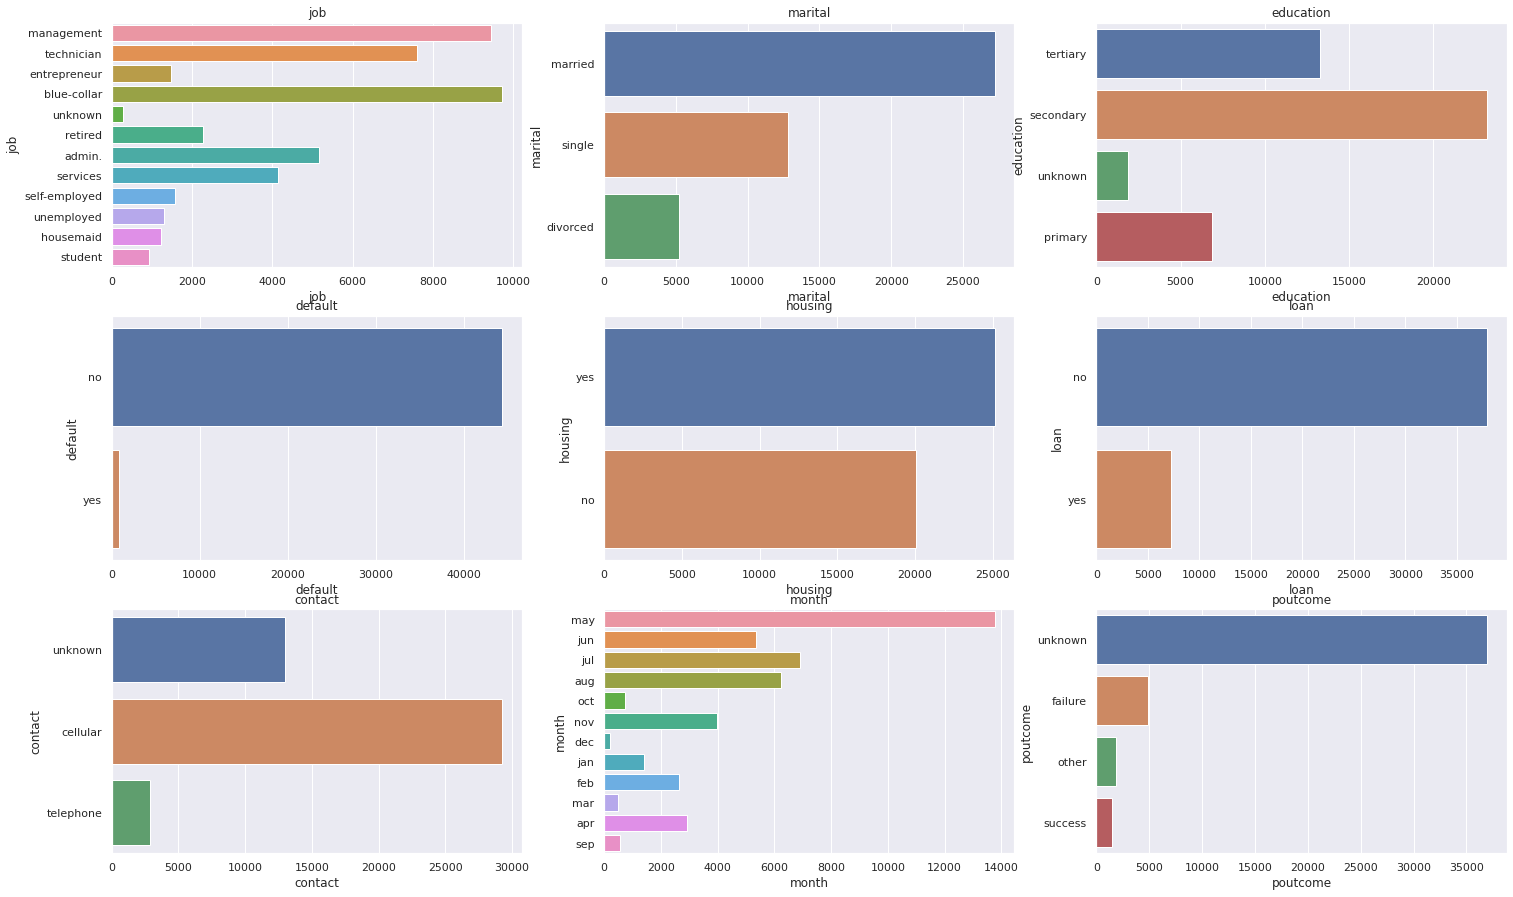

In [ ]:
#count on types of categorical features
plt.figure(figsize=(25,80), facecolor='white')
plotnum =1
for feature in cat:
    ax = plt.subplot(15,3,plotnum)
    sns.countplot(y=feature,data=df)
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.xlabel(feature)
    plt.title(feature)
    plotnum+=1
plt.show()

**Feature Engineering**



*   Remove Outliers
*   Handle Missing Values
*   Drop unwanted Features
*   handling Categorical Features




As per Exploratory Data Analysis EDA,

*   it seems some outliers found (age, balance, duration, compaign, pdays and previous has some outliers)
*   no missing value found
*   No features are dropped
*   One Hot Encoding technique

Removing Outliers

In [ ]:
out = ['campaign', 'pdays','balance','duration','previous','age'] # one or more
Q1 = df[out].quantile(0.25)
Q3 = df[out].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[out] < (Q1 - 1.5 * IQR)) |(df[out] > (Q3 + 1.5 * IQR))).any(axis=1)]

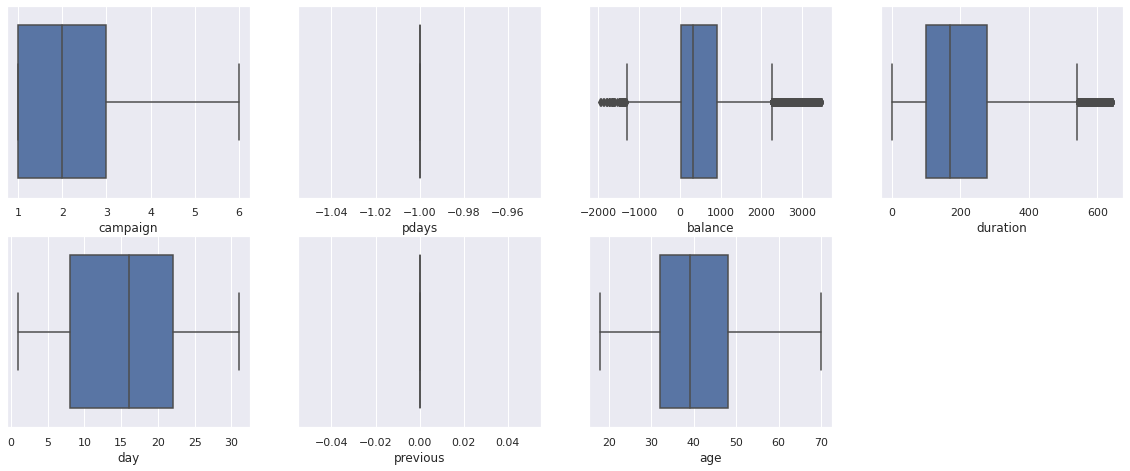

In [ ]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,50), facecolor='white')
plotnum =1
for feature in num:
    ax = plt.subplot(12,4,plotnum)
    sns.boxplot(df[feature])
    plt.xlabel(feature)
    plotnum+=1
plt.show()

One Hot Encoding

In [ ]:
for col in cat:
    one_hot=pd.get_dummies(df[cat],drop_first = True)
one_hot.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
df = pd.concat([df,one_hot], axis = 1)

In [ ]:
l_cat=list(one_hot.columns)

In [ ]:
df[l_cat].head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
print('Total features:', len(l_cat+num))
print('Numerical Features:',len(num))
print('Categorical Features:',len(l_cat))

Total features: 39
Numerical Features: 7
Categorical Features: 32


**Checking for Missing Values**

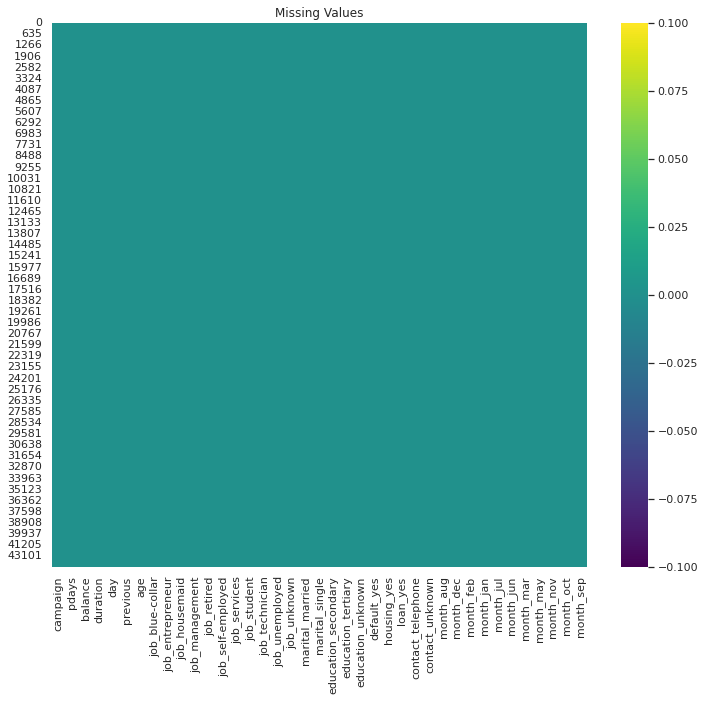

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df[num+l_cat].isna(), cmap='viridis')
plt.title("Missing Values")
plt.show()

In [ ]:
data = num + l_cat
final_df = df[data + ['deposit']]

In [ ]:
len(data)

39

In [ ]:
final_df.head()

,campaign,pdays,balance,duration,day,previous,age,job_blue-collar,job_entrepreneur,job_housemaid,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,deposit
0,1,-1,2143,261,5,0,58,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,-1,29,151,5,0,44,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,-1,2,76,5,0,33,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,1,-1,1506,92,5,0,47,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,-1,1,198,5,0,33,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Building Training, Validation & Test Samples

In [ ]:
#shuffle the samples
final_df = final_df.sample(n = len(final_df), random_state = 42)
final_df = final_df.reset_index(drop = True)

In [ ]:
valid_test_ratio=final_df.sample(frac=0.30,random_state=42)
print('Split size: %.3f'%(len(valid_test_ratio)/len(final_df)))

Split size: 0.300


In [ ]:
test_ratio = valid_test_ratio.sample(frac = 0.5, random_state = 42)
valid_ratio = valid_test_ratio.drop(test_ratio.index)

In [ ]:
#Training data
train_rest=final_df.drop(valid_test_ratio.index)

In [ ]:
def prevalence(y_actual):
    # this function calculates the prevalence of the positive class (label = 1)
    return (sum(y_actual)/len(y_actual))

In [ ]:
# check the prevalence of each 
print('Test prevalence(n = %d):%.3f'%(len(test_ratio),prevalence(test_ratio.deposit.values)))
print('Valid prevalence(n = %d):%.3f'%(len(valid_ratio),prevalence(valid_ratio.deposit.values)))
print('Train prevalence(n = %d):%.3f'%(len(train_rest),prevalence(train_rest.deposit.values)))

Test prevalence(n = 4229):0.054
Valid prevalence(n = 4229):0.057
Train prevalence(n = 19735):0.057


In [ ]:
# split the training data into positive and negative
pos = train_rest.deposit == 1
train_rest_pos = train_rest.loc[pos]
train_rest_neg = train_rest.loc[~pos]

# merge the balanced data
train = pd.concat([train_rest_pos, train_rest_neg.sample(n = len(train_rest_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples 
train = train.sample(n = len(train), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(train), prevalence(train.deposit.values)))

Train balanced prevalence(n = 2256):0.500


In [ ]:
# split the validation into positive and negative
pos = valid_ratio.deposit == 1
valid_ratio_pos = valid_ratio.loc[pos]
valid_ratio_neg = valid_ratio.loc[~pos]

# merge the balanced data
valid_ratio = pd.concat([valid_ratio_pos, valid_ratio_neg.sample(n = len(valid_ratio_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples 
valid_ratio = valid_ratio.sample(n = len(valid_ratio), random_state = 42).reset_index(drop = True)

print('Valid balanced prevalence(n = %d):%.3f'%(len(valid_ratio), prevalence(train.deposit.values)))

Valid balanced prevalence(n = 482):0.500


In [ ]:
# split the test into positive and negative
pos = test_ratio.deposit == 1
test_ratio_pos = test_ratio.loc[pos]
test_ratio_neg = test_ratio.loc[~pos]

# merge the balanced data
test_ratio = pd.concat([test_ratio_pos, test_ratio_neg.sample(n = len(test_ratio_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples 
test_ratio = test_ratio.sample(n = len(test_ratio), random_state = 42).reset_index(drop = True)

print('Test balanced prevalence(n = %d):%.3f'%(len(test_ratio), prevalence(train.deposit.values)))

Test balanced prevalence(n = 460):0.500


In [ ]:
train_rest.to_csv('train_rest.csv',index=False)
train.to_csv('train.csv',index=False)
valid_ratio.to_csv('valid_ratio.csv',index=False)
test_ratio.to_csv('test_ratio.csv',index=False)

In [ ]:
import pickle
pickle.dump(data, open('data.sav', 'wb'))

In [ ]:
def fill_null(df, mean, cols):
    # This function fills the missing values

    # check the columns are present
    for i in cols:
        assert i in df.columns, i + ' not in df'
        assert i in mean.col.values, i+ 'not in mean'
    
    # replace the mean 
    for i in cols:
        m_val = mean.loc[mean.col == i,'mean_val'].values[0]
        df[i] = df[i].fillna(m_val)
    return df

In [ ]:
mean = train_rest[data].mean(axis = 0)
# save the means
mean.to_csv('mean.csv',index=True,header=True)

In [ ]:
mean_in = pd.read_csv('mean.csv', names =['col','mean_val'],)

In [ ]:
train_rest = fill_null(train_rest, mean_in, data)
train = fill_null(train, mean_in, data)
valid_ratio = fill_null(valid_ratio, mean_in, data)

In [ ]:
# create the X and y matrices
X_train = train[data].values
X_train_rest = train_rest[data].values
X_valid = valid_ratio[data].values

y_train = train['deposit'].values
y_valid = valid_ratio['deposit'].values

print('Training Rest shape :',X_train_rest.shape)
print('Training shape :',X_train.shape, y_train.shape)
print('Validation shape:',X_valid.shape, y_valid.shape)

Training Rest shape : (19735, 39)
Training shape : (2256, 39) (2256,)
Validation shape: (482, 39) (482,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc  = StandardScaler()
sc.fit(X_train_rest)

StandardScaler()

In [ ]:
scfile = 'sc.sav'
pickle.dump(sc, open(scfile, 'wb'))

In [ ]:
# load it back
sc = pickle.load(open(scfile, 'rb'))

In [ ]:
# transform our data matrices
X_train_tfm = sc.transform(X_train)
X_valid_tfm = sc.transform(X_valid)

Model Selection

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
def spf(y_actual, y_pred, thold):
    # calculates specificity
    return sum((y_pred < thold) & (y_actual == 0)) /sum(y_actual ==0)

def report(y_actual, y_pred, thold):
    
    auc = roc_auc_score(y_actual, y_pred)
    acc = accuracy_score(y_actual, (y_pred > thold))
    recall = recall_score(y_actual, (y_pred > thold))
    precision = precision_score(y_actual, (y_pred > thold))
    specificity = spf(y_actual, y_pred, thold)
    f1_score = 2 * (precision * recall) / (precision + recall)
   
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%acc)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%prevalence(y_actual))
    print('f1:%.3f'%f1_score)
    print(' ')
    return auc, acc, recall, precision, specificity, f1_score

In [ ]:
thold = 0.5

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from prettytable import PrettyTable
from sklearn.model_selection import RandomizedSearchCV

K nearest neighbors (KNN)

In [ ]:
knn=KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train_tfm, y_train)

KNeighborsClassifier(n_neighbors=100)

In [ ]:
y_train_pred = knn.predict_proba(X_train_tfm)[:,1]
y_valid_pred = knn.predict_proba(X_valid_tfm)[:,1]

print('KNN Classifier')
print('Training Ratios:')
knn_train_auc, knn_train_accuracy, knn_train_recall, \
    knn_train_precision, knn_train_specificity, knn_train_f1 = report(y_train,y_train_pred, thold)
print('Validation Ratios:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, \
    knn_valid_precision, knn_valid_specificity, knn_valid_f1 = report(y_valid,y_valid_pred, thold)



KNN Classifier
Training Ratios:
AUC:0.857
accuracy:0.767
recall:0.727
precision:0.790
specificity:0.798
prevalence:0.500
f1:0.757
 
Validation Ratios:
AUC:0.832
accuracy:0.751
recall:0.672
precision:0.798
specificity:0.805
prevalence:0.500
f1:0.730
 


Logistic Regression

In [ ]:
logr=LogisticRegression(random_state = 42)
logr.fit(X_train_tfm, y_train)

LogisticRegression(random_state=42)

In [ ]:
y_train_pred = logr.predict_proba(X_train_tfm)[:,1]
y_valid_pred = logr.predict_proba(X_valid_tfm)[:,1]

print('Logistic Regression ')
print('Training Ratios:')
logr_train_auc, logr_train_accuracy, logr_train_recall, \
    logr_train_precision, logr_train_specificity, logr_train_f1= report(y_train,y_train_pred, thold)
print('Validation Ratios:')
logr_valid_auc, logr_valid_accuracy, logr_valid_recall, \
    logr_valid_precision, logr_valid_specificity, logr_valid_f1= report(y_valid,y_valid_pred, thold)

Logistic Regression 
Training Ratios:
AUC:0.903
accuracy:0.824
recall:0.830
precision:0.821
specificity:0.819
prevalence:0.500
f1:0.825
 
Validation Ratios:
AUC:0.875
accuracy:0.797
recall:0.826
precision:0.780
specificity:0.768
prevalence:0.500
f1:0.802
 


Stochastic Gradient Descent

In [ ]:
sgd=SGDClassifier(loss = 'log',alpha = 0.1,random_state = 42)
sgd.fit(X_train_tfm, y_train)

SGDClassifier(alpha=0.1, loss='log', random_state=42)

In [ ]:
y_train_pred = sgd.predict_proba(X_train_tfm)[:,1]
y_valid_pred = sgd.predict_proba(X_valid_tfm)[:,1]

print('Stochastic Gradient Descent Classifier')
print('Training Ratios:')
sgd_train_auc, sgd_train_accuracy, sgd_train_recall, sgd_train_precision, sgd_train_specificity, sgd_train_f1 =report(y_train,y_train_pred, thold)
print('Validation Ratios:')
sgd_valid_auc, sgd_valid_accuracy, sgd_valid_recall, sgd_valid_precision, sgd_valid_specificity, sgd_valid_f1 = report(y_valid,y_valid_pred, thold)

Stochastic Gradient Descent Classifier
Training Ratios:
AUC:0.897
accuracy:0.814
recall:0.809
precision:0.817
specificity:0.819
prevalence:0.500
f1:0.813
 
Validation Ratios:
AUC:0.875
accuracy:0.790
recall:0.797
precision:0.787
specificity:0.784
prevalence:0.500
f1:0.792
 


Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train_tfm, y_train)

GaussianNB()

In [ ]:
y_train_pred = gnb.predict_proba(X_train_tfm)[:,1]
y_valid_pred = gnb.predict_proba(X_valid_tfm)[:,1]

print('Naive Bayes')
print('Training Ratios:')
gnb_train_auc, gnb_train_accuracy, gnb_train_recall, gnb_train_precision, gnb_train_specificity, gnb_train_f1 = report(y_train,y_train_pred, thold)
print('Validation Ratios:')
gnb_valid_auc, gnb_valid_accuracy, gnb_valid_recall, gnb_valid_precision, gnb_valid_specificity, gnb_valid_f1 = report(y_valid,y_valid_pred, thold)

Naive Bayes
Training Ratios:
AUC:0.809
accuracy:0.680
recall:0.468
precision:0.812
specificity:0.892
prevalence:0.500
f1:0.594
 
Validation Ratios:
AUC:0.790
accuracy:0.676
recall:0.469
precision:0.801
specificity:0.884
prevalence:0.500
f1:0.592
 


Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier(max_depth = 10, random_state = 42)
dt.fit(X_train_tfm, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [ ]:
y_train_pred = dt.predict_proba(X_train_tfm)[:,1]
y_valid_pred = dt.predict_proba(X_valid_tfm)[:,1]

print('Decision Tree')
print('Training:')
dt_train_auc, dt_train_accuracy, dt_train_recall, dt_train_precision, dt_train_specificity, dt_train_f1= report(y_train,y_train_pred, thold)
print('Validation:')
dt_valid_auc, dt_valid_accuracy, dt_valid_recall, dt_valid_precision, dt_valid_specificity, dt_valid_f1 = report(y_valid,y_valid_pred,thold)

Decision Tree
Training:
AUC:0.984
accuracy:0.938
recall:0.958
precision:0.921
specificity:0.914
prevalence:0.500
f1:0.939
 
Validation:
AUC:0.790
accuracy:0.793
recall:0.817
precision:0.779
specificity:0.755
prevalence:0.500
f1:0.798
 


Random Forest

In [ ]:
rfc=RandomForestClassifier(max_depth = 6, random_state = 42)
rfc.fit(X_train_tfm, y_train)

RandomForestClassifier(max_depth=6, random_state=42)

In [ ]:
y_train_pred = rfc.predict_proba(X_train_tfm)[:,1]
y_valid_pred = rfc.predict_proba(X_valid_tfm)[:,1]

print('Random Forest Classifier')
print('Training Ratios:')
rfc_train_auc, rfc_train_accuracy, rfc_train_recall, rfc_train_precision, rfc_train_specificity, rfc_train_f1 =report(y_train,y_train_pred, thold)
print('Validation Ratios:')
rfc_valid_auc, rfc_valid_accuracy, rfc_valid_recall, rfc_valid_precision, rfc_valid_specificity, rfc_valid_f1 = report(y_valid,y_valid_pred, thold)

Random Forest Classifier
Training Ratios:
AUC:0.930
accuracy:0.856
recall:0.911
precision:0.821
specificity:0.801
prevalence:0.500
f1:0.864
 
Validation Ratios:
AUC:0.886
accuracy:0.801
recall:0.867
precision:0.766
specificity:0.734
prevalence:0.500
f1:0.813
 


Gradient Boosting Classifier

In [ ]:
gb =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gb.fit(X_train_tfm, y_train)

GradientBoostingClassifier(learning_rate=1.0, random_state=42)

In [ ]:
y_train_pred = gb.predict_proba(X_train_tfm)[:,1]
y_valid_pred = gb.predict_proba(X_valid_tfm)[:,1]

print('Gradient Boosting Classifier')
print('Training Ratios:')
gb_train_auc, gb_train_accuracy, gb_train_recall, gb_train_precision, gb_train_specificity, gb_train_f1 = report(y_train,y_train_pred, thold)
print('Validation Ratios:')
gb_valid_auc, gb_valid_accuracy, gb_valid_recall, gb_valid_precision, gb_valid_specificity, gb_valid_f1 = report(y_valid,y_valid_pred,thold)

Gradient Boosting Classifier
Training Ratios:
AUC:0.999
accuracy:0.995
recall:0.996
precision:0.994
specificity:0.994
prevalence:0.500
f1:0.995
 
Validation Ratios:
AUC:0.887
accuracy:0.828
recall:0.863
precision:0.806
specificity:0.793
prevalence:0.500
f1:0.834
 


Analyze results baseline models

In [ ]:
df_results = pd.DataFrame({'classifier':['KNN','KNN','LR','LR','SGD','SGD','NB','NB','DT','DT','RF','RF','GB','GB'],
                           'data_set':['train_ratio','valid_ratio']*7,
                          'auc':[knn_train_auc, knn_valid_auc,logr_train_auc,logr_valid_auc,sgd_train_auc,sgd_valid_auc,gnb_train_auc,gnb_valid_auc,dt_train_auc,dt_valid_auc,rfc_train_auc,rfc_valid_auc,gb_train_auc,gb_valid_auc,],
                          'accuracy':[knn_train_accuracy, knn_valid_accuracy,logr_train_accuracy,logr_valid_accuracy,sgd_train_accuracy,sgd_valid_accuracy,gnb_train_accuracy,gnb_valid_accuracy,dt_train_accuracy,dt_valid_accuracy,rfc_train_accuracy,rfc_valid_accuracy,gb_train_accuracy,gb_valid_accuracy,],
                          'recall':[knn_train_recall, knn_valid_recall,logr_train_recall,logr_valid_recall,sgd_train_recall,sgd_valid_recall,gnb_train_recall,gnb_valid_recall,dt_train_recall,dt_valid_recall,rfc_train_recall,rfc_valid_recall,gb_train_recall,gb_valid_recall,],
                          'precision':[knn_train_precision, knn_valid_precision,logr_train_precision,logr_valid_precision,sgd_train_precision,sgd_valid_precision,gnb_train_precision,gnb_valid_precision,dt_train_precision,dt_valid_precision,rfc_train_precision,rfc_valid_precision,gb_train_precision,gb_valid_precision,],
                          'specificity':[knn_train_specificity, knn_valid_specificity,logr_train_specificity,logr_valid_specificity,sgd_train_specificity,sgd_valid_specificity,gnb_train_specificity,gnb_valid_specificity,dt_train_specificity,dt_valid_specificity,rfc_train_specificity,rfc_valid_specificity,gb_train_specificity,gb_valid_specificity,],
                          'f1':[knn_train_f1, knn_valid_f1,logr_train_f1,logr_valid_f1,sgd_train_f1,sgd_valid_f1,gnb_train_f1,gnb_valid_f1,dt_train_f1,dt_valid_f1,rfc_train_f1,rfc_valid_f1,gb_train_f1,gb_valid_f1,],
                          })

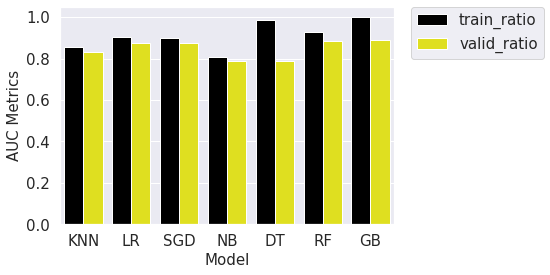

In [ ]:
sns.set(style="darkgrid")
dgm = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results,palette=['black','yellow'])
dgm.set_xlabel('Model',fontsize = 15)
dgm.set_ylabel('AUC Metrics', fontsize = 15)
dgm.tick_params(labelsize=15)

# legend at top right corner
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.metrics import roc_curve 

Learning Curves

In [ ]:
def plot_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide ` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training")
    plt.ylabel("AUC")
    train_sizes, train_score, test_score = learning_curve(
        estimator, X, y, cv=cval, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_score_mean = np.mean(train_score, axis=1)
    train_score_sd= np.std(train_score, axis=1)
    test_score_mean = np.mean(test_score, axis=1)
    test_score_sd = np.std(test_score, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_score_mean - train_score_sd,
                     train_score_mean + train_score_sd, alpha=0.1,
                     color="b")
    plt.fill_between(train_sizes, test_score_mean - test_score_sd,
                     test_score_mean + test_score_sd, alpha=0.1, color="black")
    plt.plot(train_sizes, train_score_mean, '*-', color="red",
             label="Training score")
    plt.plot(train_sizes, test_score_mean, '*-', color="green",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

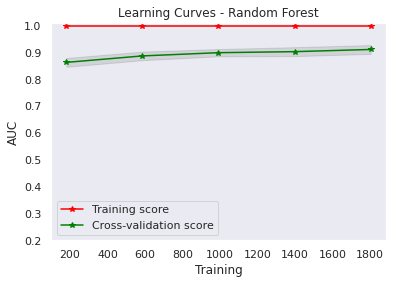

In [ ]:
title = "Learning Curves - Random Forest"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cval = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
est = RandomForestClassifier(max_depth = 20, random_state = 42)
plot_curve(est, title, X_train_tfm, y_train, ylim=(0.2, 1.01), cv=cval, n_jobs=4)
plt.show()

Feature Importance

Logistic Regression

In [ ]:
fea_imp = pd.DataFrame(logr.coef_[0],
                        index = data,columns=['importance']).sort_values('importance',ascending=False)

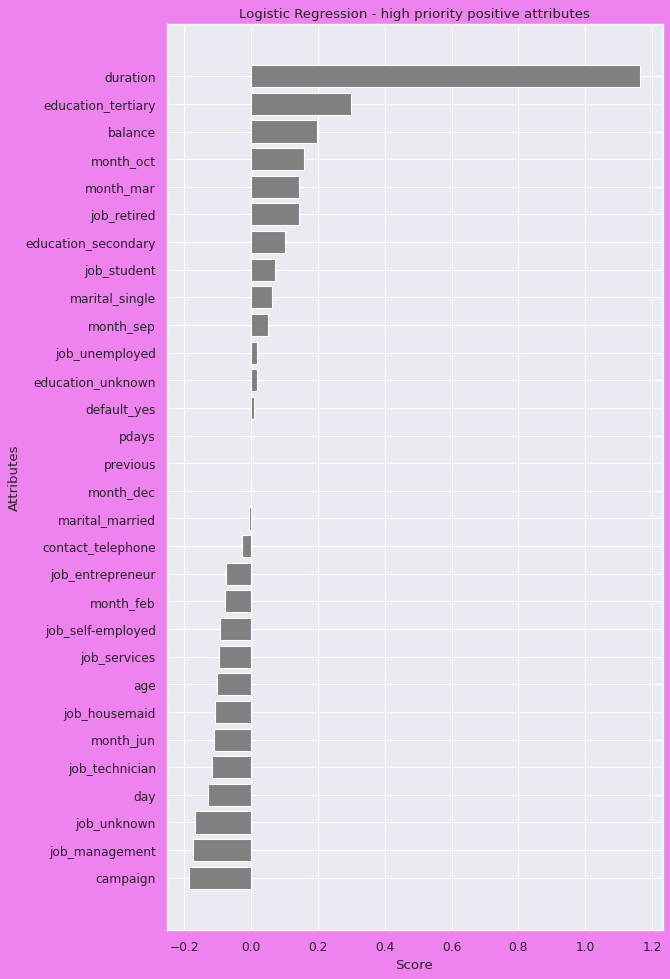

In [ ]:
number = np.min([30, len(data)])
ylocation = np.arange(number)
# get the feature importance for top num and sort in reverse order
values = fea_imp.iloc[:number].values.ravel()[::-1]
fea_labels = list(fea_imp.iloc[:number].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='violet', edgecolor='k');
plt.barh(ylocation, values, align = 'center',color='gray')
plt.ylabel('Attributes')
plt.xlabel('Score')
plt.title('Logistic Regression - high priority positive attributes')
plt.yticks(ylocation, fea_labels)
plt.show()

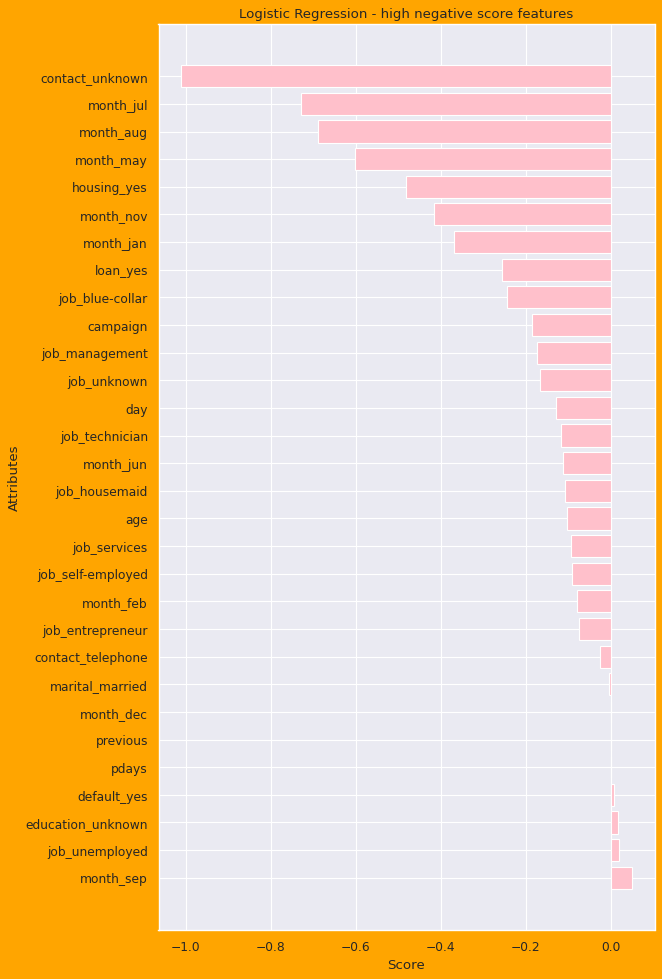

In [ ]:
values = fea_imp.iloc[-number:].values.ravel()
fea_labels = list(fea_imp.iloc[-number:].index)
plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='orange', edgecolor='k');
plt.barh(ylocation, values, align = 'center',color='pink')
plt.ylabel('Attributes')
plt.xlabel('Score')
plt.title('Logistic Regression - high negative score features')
plt.yticks(ylocation, fea_labels)
plt.show()

Random Forest

In [ ]:
fea_imp = pd.DataFrame(rfc.feature_importances_,
                                   index = data,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
fea_imp.head()

,importance
duration,0.325942
contact_unknown,0.155441
housing_yes,0.089515
age,0.067158
balance,0.050795


Hyperparameter tuning

In [ ]:
# train a model for each max_depth in a list. Store the auc for the training and validation set

# max depths
max_depth = np.arange(2,20,2)

auc_train = np.zeros(len(max_depth))
auc_valid = np.zeros(len(max_depth))

for ii in range(len(max_depth)):
    depths = max_depth[ii]

    # fit model
    rfc=RandomForestClassifier(n_estimators = 100, max_depth = depths, random_state = 42)
    rfc.fit(X_train_tfm, y_train)        
    # get predictions
    y_train_pred = rfc.predict_proba(X_train_tfm)[:,1]
    y_valid_pred = rfc.predict_proba(X_valid_tfm)[:,1]

    # calculate auc
    train_auc_score = roc_auc_score(y_train, y_train_pred)
    valid_auc_score = roc_auc_score(y_valid, y_valid_pred)

    # save aucs
    auc_train[ii] = train_auc_score
    auc_valid[ii] = valid_auc_score

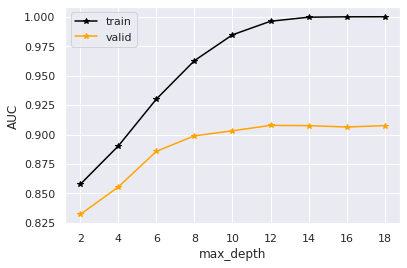

In [ ]:
plt.plot(max_depth, auc_train,'*-',label = 'train',color='black')
plt.plot(max_depth, auc_valid,'*-',label = 'valid',color='orange')

plt.xlabel('max_depth')
plt.ylabel('AUC')
plt.legend()
plt.show()

In [ ]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 18,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# number of trees
n_est = range(200,1000,200)
# maximum number of features to use at each split
max_feat = ['auto','sqrt']
# maximum depth of the tree
max_depth = range(2,20,2)
# minimum number of samples to split a node
min_samp_split = range(2,10,2)
# criterion for evaluating a split
crit= ['gini','entropy']

# random grid

grid = {'n_estimators':n_est,
              'max_features':max_feat,
              'max_depth':max_depth,
              'min_samples_split':min_samp_split,
              'criterion':crit}

print(grid)

{'n_estimators': range(200, 1000, 200), 'max_features': ['auto', 'sqrt'], 'max_depth': range(2, 20, 2), 'min_samples_split': range(2, 10, 2), 'criterion': ['gini', 'entropy']}


In [ ]:
auc_scoring = make_scorer(roc_auc_score)

In [ ]:
# create a baseline model
rfc = RandomForestClassifier()

# create the randomized search cross-validation
rfc_randomized = RandomizedSearchCV(estimator = rfc, param_distributions = grid, 
                               n_iter = 20, cv = 2, 
                               scoring=auc_scoring,verbose = 1, random_state = 42)

In [ ]:
import time
# fit the random search model (this will take a few minutes)
t = time.time()
rfc_randomized.fit(X_train_tfm, y_train)
t1 = time.time()
print(t1-t)

Fitting 2 folds for each of 20 candidates, totalling 40 fits
56.46335458755493


In [ ]:
rfc_randomized.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'max_features': 'sqrt',
 'max_depth': 14,
 'criterion': 'entropy'}

In [ ]:
rfc=RandomForestClassifier(max_depth = 6, random_state = 42)
rfc.fit(X_train_tfm, y_train)

y_train_pred = rfc.predict_proba(X_train_tfm)[:,1]
y_valid_pred = rfc.predict_proba(X_valid_tfm)[:,1]

thresh = 0.5
print("Baseline Random Forest AUC's")
rfc_train_base= roc_auc_score(y_train, y_train_pred)
rfc_valid_base = roc_auc_score(y_valid, y_valid_pred)

print('Training :%.3f'%(rfc_train_base))
print('Validation :%.3f'%(rfc_valid_base))

print('Optimized Random Forest')
y_train_pred_random = rfc_randomized.best_estimator_.predict_proba(X_train_tfm)[:,1]
y_valid_pred_random = rfc_randomized.best_estimator_.predict_proba(X_valid_tfm)[:,1]

rfc_train_opt = roc_auc_score(y_train, y_train_pred_random)
rfc_valid_opt = roc_auc_score(y_valid, y_valid_pred_random)

print('Training :%.3f'%(rfc_train_opt))
print('Validation :%.3f'%(rfc_valid_opt))

Baseline Random Forest AUC's
Training :0.930
Validation :0.886
Optimized Random Forest
Training :0.998
Validation :0.909


In [ ]:
penalty = ['none','l2','l1']
iter = range(200,1000,200)
alpha = [0.001,0.003,0.01,0.03,0.1,0.3]
grid_sgd = {'penalty':penalty,
              'max_iter':iter,
              'alpha':alpha}
# create the randomized search cross-validation
sgd_randomized = RandomizedSearchCV(estimator = sgd, param_distributions = grid_sgd, n_iter = 20, cv = 2, scoring=auc_scoring,verbose = 0, random_state = 42)

t = time.time()
sgd_randomized.fit(X_train_tfm, y_train)
t1 = time.time()
print(t1-t)

1.156053066253662


In [ ]:
sgd_randomized.best_params_

{'penalty': 'l1', 'max_iter': 400, 'alpha': 0.001}

In [ ]:
y_train_pred = sgd.predict_proba(X_train_tfm)[:,1]
y_valid_pred = sgd.predict_proba(X_valid_tfm)[:,1]

thresh = 0.5

print("Baseline sgdc AUC's")
sgd_train_base = roc_auc_score(y_train, y_train_pred)
sgd_valid_base = roc_auc_score(y_valid, y_valid_pred)

print('Training :%.3f'%(sgd_train_base))
print('Validation :%.3f'%(sgd_valid_base))

print("Optimized sgd AUC'S")
y_train_pred_random = sgd_randomized.best_estimator_.predict_proba(X_train_tfm)[:,1]
y_valid_preds_random = sgd_randomized.best_estimator_.predict_proba(X_valid_tfm)[:,1]
sgd_train_opt = roc_auc_score(y_train, y_train_pred_random)
sgd_valid_opt = roc_auc_score(y_valid, y_valid_pred_random)

print('Training :%.3f'%(sgd_train_opt))
print('Validation :%.3f'%(sgd_valid_opt))

Baseline sgdc AUC's
Training :0.897
Validation :0.875
Optimized sgd AUC'S
Training :0.896
Validation :0.909


In [ ]:
# number of trees
n_est = range(50,200,50)

# maximum depth of the tree
max_depth = range(1,5,1)

# learning rate
learning_rate = [0.001,0.01,0.1]

# random grid

grid_gb = {'n_estimators':n_est,
              'max_depth':max_depth,
              'learning_rate':learning_rate}

# create the randomized search cross-validation
gb_randomized = RandomizedSearchCV(estimator = gb, param_distributions = grid_gb, n_iter = 20, cv = 2, scoring=auc_scoring,verbose = 0, random_state = 42)

t = time.time()
gb_randomized.fit(X_train_tfm, y_train)
t1 = time.time()
print(t1-t)

12.601844310760498


In [ ]:
gb_randomized.best_params_

{'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1}

In [ ]:
y_train_pred = gb.predict_proba(X_train_tfm)[:,1]
y_valid_pred = gb.predict_proba(X_valid_tfm)[:,1]

thresh = 0.5

print("Baseline gb AUC's" )
gb_train_base = roc_auc_score(y_train, y_train_pred)
gb_valid_base = roc_auc_score(y_valid, y_valid_pred)

print('Training :%.3f'%(gb_train_base))
print('Validation :%.3f'%(gb_valid_base))
print("Optimized gb AUC's")
y_train_pred_random = gb_randomized.best_estimator_.predict_proba(X_train_tfm)[:,1]
y_valid_pred_random = gb_randomized.best_estimator_.predict_proba(X_valid_tfm)[:,1]
gb_train_opt = roc_auc_score(y_train, y_train_pred_random)
gb_valid_opt = roc_auc_score(y_valid, y_valid_pred_random)

print('Training :%.3f'%(gb_train_opt))
print('Validation :%.3f'%(gb_valid_opt))

Baseline gb AUC's
Training :0.999
Validation :0.887
Optimized gb AUC's
Training :0.976
Validation :0.914


Analyzing the 3 results

In [ ]:
results = pd.DataFrame({'classifier':['SGD','SGD','RF','RF','GB','GB'],
                           'data_set':['baseline','optimized']*3,
                          'auc':[sgd_valid_base,sgd_valid_opt,
                                 rfc_valid_base,rfc_valid_opt,
                                 gb_valid_base,gb_valid_opt],
                          })

In [ ]:
results

,classifier,data_set,auc
0,SGD,baseline,0.874589
1,SGD,optimized,0.908955
2,RF,baseline,0.885772
3,RF,optimized,0.908955
4,GB,baseline,0.887226
5,GB,optimized,0.913913


Comparing the performance of the optimized models to the baseline models.

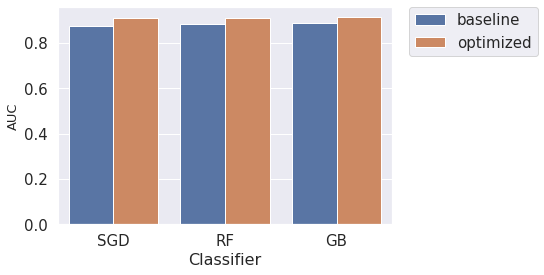

In [ ]:
dgm = sns.barplot(x="classifier", y="auc", hue="data_set", data=results)
dgm.set_xlabel('Classifier',fontsize = 16)
dgm.set_ylabel('AUC', fontsize = 13)
dgm.tick_params(labelsize=15)
# legend on top right corner 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

Picking the best model

In [ ]:
pickle.dump(gb_randomized.best_estimator_, open('best_classifier.pkl', 'wb'),protocol = 4)

Model Evaluation

In [ ]:
# load the model, columns, mean values, and scaler
best_classifier = pickle.load(open('best_classifier.pkl','rb'))
data = pickle.load(open('data.sav','rb'))
mean_in = pd.read_csv('mean.csv', names =['col','mean_val'])
sc = pickle.load(open('sc.sav', 'rb'))

In [ ]:
# load the data
train= pd.read_csv('train.csv')
valid_ratio= pd.read_csv('valid_ratio.csv')
test_ratio= pd.read_csv('test_ratio.csv')

In [ ]:
# fill missing
train = fill_null(train, mean_in, data)
valid_ratio = fill_null(valid_ratio, mean_in, data)
test_ratio = fill_null(test_ratio, mean_in, data)

# create X and y matrices
X_train = train[data].values
X_valid = valid_ratio[data].values
X_test = test_ratio[data].values

y_train = train['deposit'].values
y_valid = valid_ratio['deposit'].values
y_test = test_ratio['deposit'].values

# transform our data matrices 
X_train_tfm = sc.transform(X_train)
X_valid_tfm = sc.transform(X_valid)
X_test_tfm = sc.transform(X_test)

Prediction possibilities

In [ ]:
y_train_pred = best_classifier.predict_proba(X_train_tfm)[:,1]
y_valid_pred = best_classifier.predict_proba(X_valid_tfm)[:,1]
y_test_pred = best_classifier.predict_proba(X_test_tfm)[:,1]

Evaluating performances

In [ ]:
thold = .5

print('Training performance:')
train_auc, train_accuracy, train_recall, train_precision, train_specificity, train_f1 = report(y_train,y_train_pred, thold)
print('Validation performance:')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity, valid_f1 = report(y_valid,y_valid_pred, thold)
print('Test performance:')
test_auc, test_accuracy, test_recall, test_precision, test_specificity, test_f1 = report(y_test,y_test_pred, thold)

Training performance:
AUC:0.976
accuracy:0.919
recall:0.940
precision:0.902
specificity:0.898
prevalence:0.500
f1:0.921
 
Validation performance:
AUC:0.914
accuracy:0.822
recall:0.859
precision:0.799
specificity:0.784
prevalence:0.500
f1:0.828
 
Test performance:
AUC:0.920
accuracy:0.848
recall:0.874
precision:0.831
specificity:0.822
prevalence:0.500
f1:0.852
 


The ROC Curve

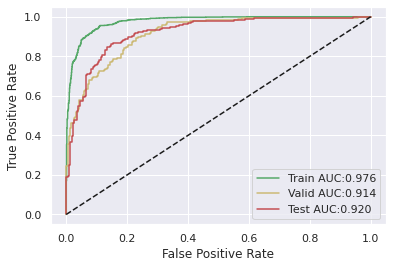

In [ ]:
fpr_train, tpr_train, thold_train = roc_curve(y_train, y_train_pred)
auc_t = roc_auc_score(y_train, y_train_pred)

fpr_valid, tpr_valid, thold_valid = roc_curve(y_valid, y_valid_pred)
auc_v= roc_auc_score(y_valid, y_valid_pred)

fpr_test, tpr_test, thold_test = roc_curve(y_test, y_test_pred)
auc_te = roc_auc_score(y_test, y_test_pred)

plt.plot(fpr_train, tpr_train, 'g-',label ='Train AUC:%.3f'%auc_t)
plt.plot(fpr_valid, tpr_valid, 'y-',label ='Valid AUC:%.3f'%auc_v)
plt.plot(fpr_test, tpr_test, 'r-',label ='Test AUC:%.3f'%auc_te)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
final_df.head()

,campaign,pdays,balance,duration,day,previous,age,job_blue-collar,job_entrepreneur,job_housemaid,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,deposit
0,2,-1,948,77,2,0,21,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,3,-1,0,389,9,0,33,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,-1,983,121,10,0,32,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,-1,303,51,3,0,44,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,-1,927,261,6,0,27,0,0,0,...,0,0,0,0,0,0,0,1,0,0
